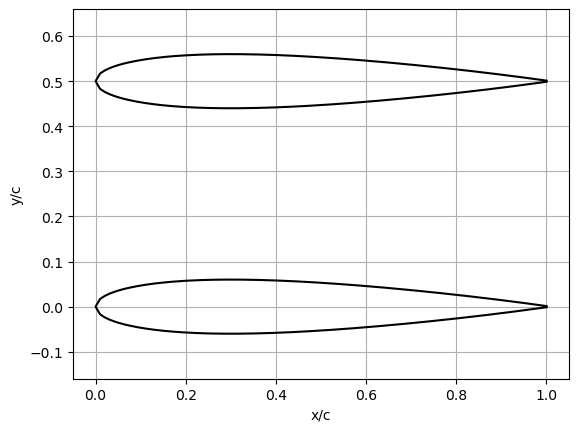

In [1]:
from aerofoil import *
from matplotlib import pyplot as plt

width = 0.5

# Create a NACA 0012 aerofoil
x,y = foil(0.12)

# create a second aerofoil
x2,y2 = foil(0.12)
y2 = y2 + width

# Plot the aerofoil
plt.plot(x,y,'k-')
plt.plot(x2,y2,'k-')
plt.axis('equal')
plt.xlabel('x/c')
plt.ylabel('y/c')
plt.grid()



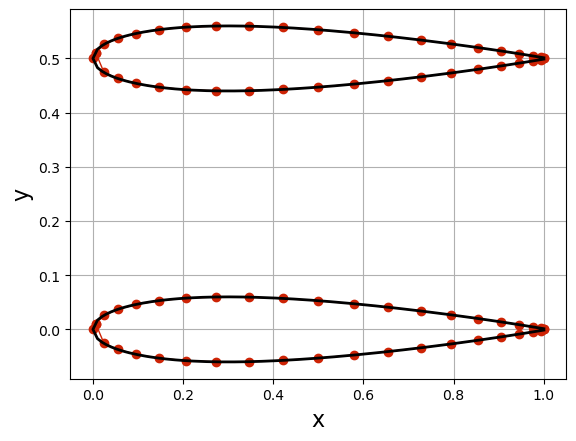

In [2]:
import numpy as np

plt.figure()
panels = np.empty(2, dtype=object)
# discretise the aerofoil into panels
for i,aerofoil in enumerate([[x,y],[x2,y2]]):
    panels[i] = define_panels(aerofoil[0],aerofoil[1],N=40)
    plt.plot(np.append([panel.xa for panel in panels[i]], panels[i][0].xa),
            np.append([panel.ya for panel in panels[i]], panels[i][0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=6, color='#CD2305')

plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, y, color='k', linestyle='-', linewidth=2)
plt.plot(x2, y2, color='k', linestyle='-', linewidth=2)




In [3]:
# define the freestream conditions
u_inf = 1.0
alpha = 0.0
freestream = Freestream(u_inf, alpha)

In [4]:
for p in panels:  
    A = A_mat(p)
    b = b_vec(p, freestream)

    # solve the linear system
    variables = np.linalg.solve(A, b)

    # store the source strength on each panel
    for i, panel in enumerate(p):
        panel.sigma = variables[i]

    # get tangential velocity at each panel center-point
    tan_vel(p, freestream)
    # get pressure coefficient at each panel center-point
    cp(p, freestream)

/Users/philblecher/Desktop/Github/DP5-code/aerofoil.py:122: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, panel.length)[0]
/Users/philblecher/Desktop/Github/DP5-code/aerofoil.py:117: RuntimeWarning: invalid value encountered in double_scalars
  return (((x - (panel.xa - np.sin(panel.beta) * s)) * dxdz +


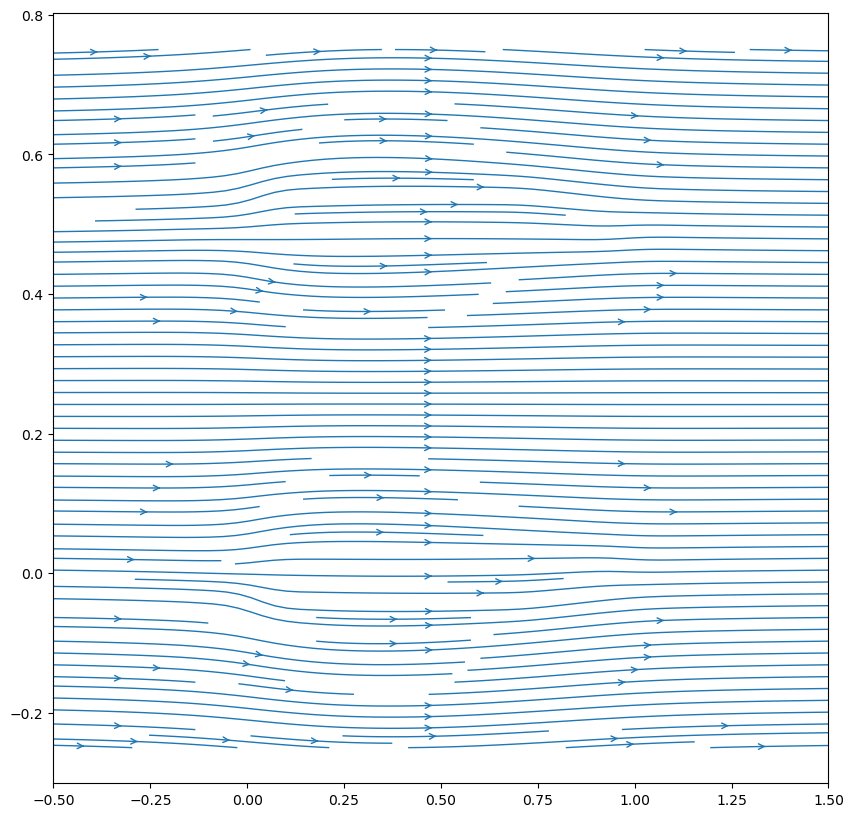

In [6]:
# define velocity field
nx, ny = 20, 20
x_start, x_end = -0.5, 1.5
y_start, y_end = -0.25, 0.75
x = np.linspace(x_start, x_end, nx)
y = np.linspace(y_start, y_end, ny)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 10))
# compute the velocity field on the mesh grid
u_tot = np.zeros((ny, nx))
v_tot = np.zeros((ny, nx))
for p in panels:
    u, v = vel_field(p, freestream, X, Y)
    u_tot += u
    v_tot += v
    
plt.streamplot(X, Y, u_tot, v_tot, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

for p in panels:
    plt.fill([panel.xc for panel in p],
        [panel.yc for panel in p],
        color='k', linestyle='solid', linewidth=2, zorder=2)

